# Diabetes Risk Analysis Using Python.

This project explores a healthcare dataset to identify patterns and risk factors associated with diabetes using exploratory data analysis.

## Loading the dataset

The dataset contains anonymous patient health information including glucose levels, BMI, age and diabetes outcome.

In [22]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

Zero values in clinical measurements were treated as missing values and replaced using the column mean to improve overall data quality.

In [25]:
import numpy as np
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

## Exploratory Data Analysis

Visualisations were created to highlight and examine the patient demographics, diabetes prevalence, and correlations between clinical variables.

## Age distribution of patients

This plot illustrates the demographic structure of the dataset by showing the frequency of patients across different age ranges.

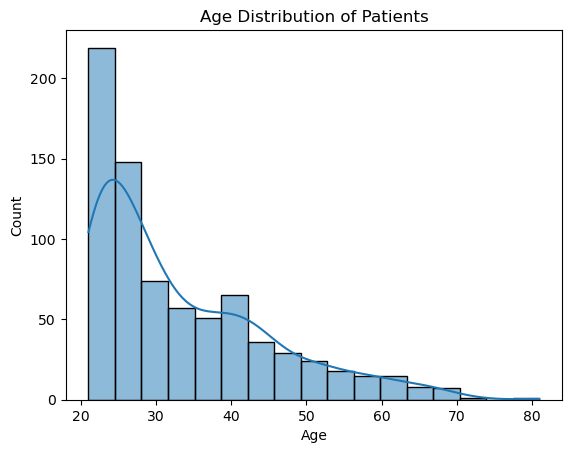

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Patients")
plt.show()

The age distribution of patients is portrayed as right-skewed, with the majority of individuals falling between early adulthood and middle age (20-40). This indicates that the dataset is primarily composed of younger to middle-aged patients, with fewer elderly individuals represented.

While this plot describes the demographic structure of the dataset, it does not directly reflect diabetes prevalence across the age groups. Therefore, conclusions regarding age-related risk must be interpreted in conjunction with outcome-based investigations rather than the population frequency.

## Distribution of diabetes outcomes

The outcome variable represents diabetes status, where 0 indicates non-diabetic patients and 1 indicates patients diagnosed with diabetes. 

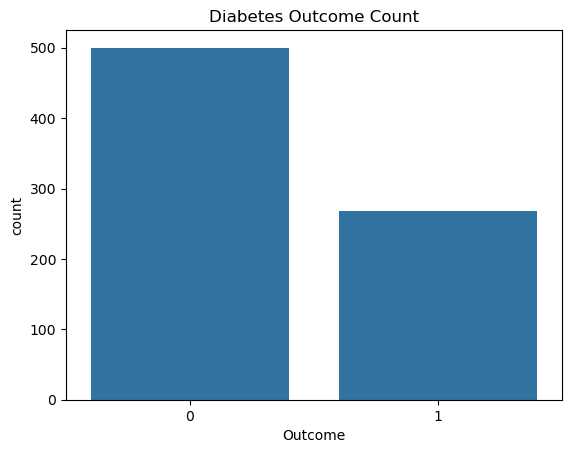

In [27]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Count")
plt.show()

The distribution shows a higher number of non-diabetic patients compared to diabetic patients, indicating an imbalance within the dataset. This is a common characteristic of real-world healthcare data and should be considered when interpreting results or developing predictive models.

## Diabetes prevalence by age group

To assess whether diabetes prevalence varies across age groups and is significant, patients were grouped into clinically interpretable age ranges and the proportion of diabetic cases was calculated for each group.

In [28]:
import pandas as pd

# Create age groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], right=False)

In [29]:
age_prevalence = df.groupby("AgeGroup", observed=False)["Outcome"].mean()
age_prevalence

AgeGroup
[20, 30)    0.212121
[30, 40)    0.460606
[40, 50)    0.550847
[50, 60)    0.596491
[60, 70)    0.275862
[70, 80)    0.500000
Name: Outcome, dtype: float64

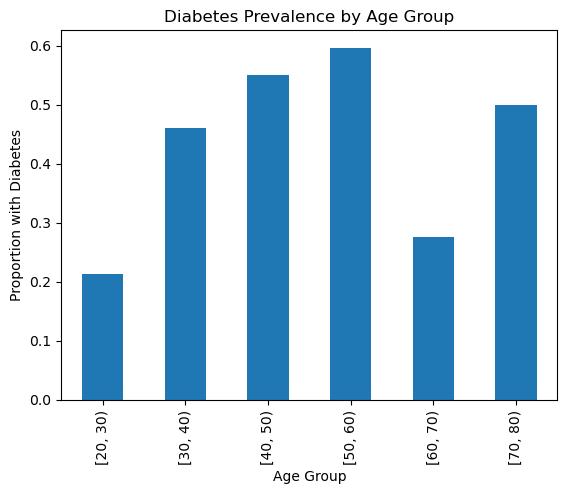

In [30]:
import matplotlib.pyplot as plt

age_prevalence.plot(kind="bar")
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("Age Group")
plt.show()

The results indicate an increasing prevalence of diabetes with age, consistent with established clinical evidence that age is indeed a significant risk factor for type 2 diabetes.

## Correlation analysis of clinical variables

To examine relationships between clinical variables and diabetes outcome, a correlation heatmap was generated using Pearson correlation coefficients. The outcome variable is binary, where 0 represents non-diabetic patients and 1 represents patients diagnosed with diabetes.

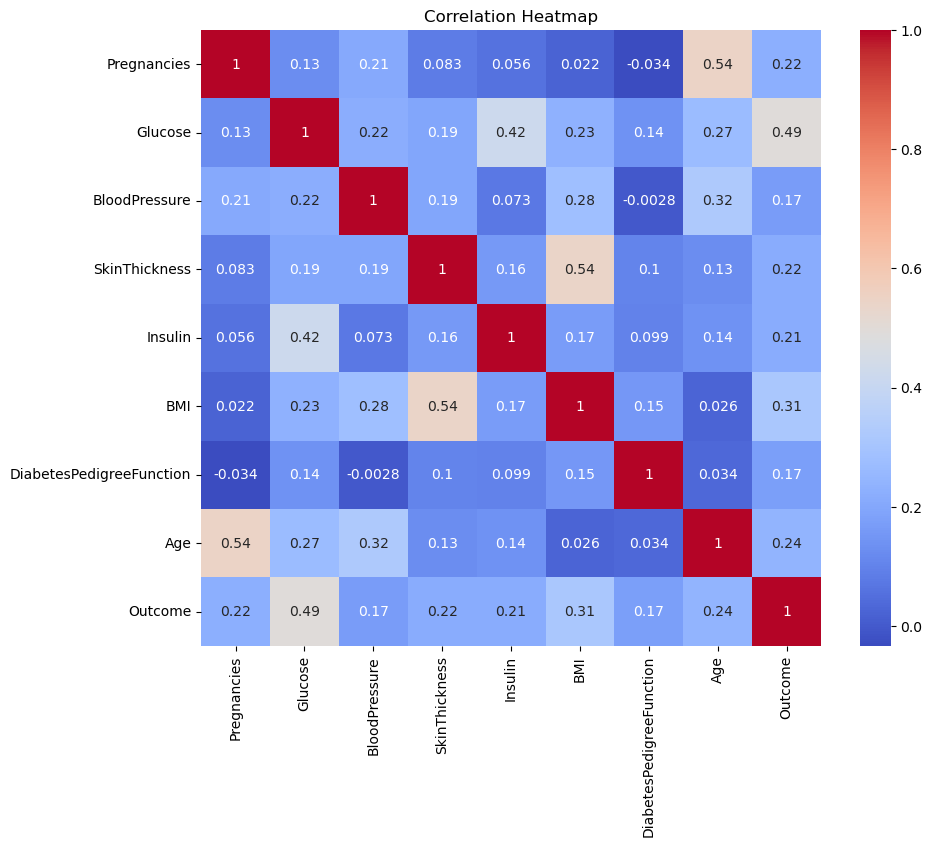

In [31]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

As a result, positive correlations between clinical variables and the outcome highlight an increased association with diabetes. This analysis helps to identify which features are most strongly associated with diabetes outcome and provides quantitative support for trends observed in the exploratory visualisations.

Although correlation provides useful insight into associations, it does not capture non-linear relationships or imply causation of diseases due to the factors.

## Key Findings

- The dataset consists of younger to middle-aged patients, with fewer elderly individuals present - highlighting the importance of cautious interpretation when assessing age-related trends.

- Glucose levels show the strongest positive correlation with diabetes outcome, indicating a clear association between elevated glucose and the presence of diabetes.

- Body mass index (BMI) demonstrates a moderate positive association with diabetes outcome.

- Age exhibits a positive correlation with diabetes outcome, and prevalence analysis by age group indicates an increasing proportion of diabetic patients among older age groups.

- The outcome variable is imbalanced, with more non-diabetic than diabetic patients, reflecting a common characteristic of real-world healthcare datasets.

## Conclusion

This project used exploratory data analysis techniques to a healthcare dataset to investigate the clinical factors associated with diabetes. Through data cleaning, visualisation, correlation analysis and prevalence estimation, key variables such as glucose levels, BMI and age were identified as being associated with diabetes outcome.

The analysis demonstrates the importance of combining population-level distributions with outcome-based analysis to avoid misinterpretation of risk
factors. While the dataset is favoured towards younger individuals, age-related trends in diabetes prevalence remain evident and align with established clinical understanding.

This project highlights the value of Python-based data analysis for extracting insights from biomedical data and provides a strong foundation for future work involving predictive modelling and more advanced health data analytics.

To conclude, this project reflects my growing interest in applying data science techniques to real-world biomedical problems and further motivates my desire to study in bioinformatics and health data science.
